In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1**

In [2]:
sin200 = np.memmap('/content/drive/MyDrive/Processamento_Digital_De_Sinais/Aula_5/sin_200hz.pcm', mode='r', dtype=np.int16)

sin2000 = np.memmap('/content/drive/MyDrive/Processamento_Digital_De_Sinais/Aula_5/sin_2000hz.pcm', mode='r', dtype=np.int16)

<StemContainer object of 3 artists>

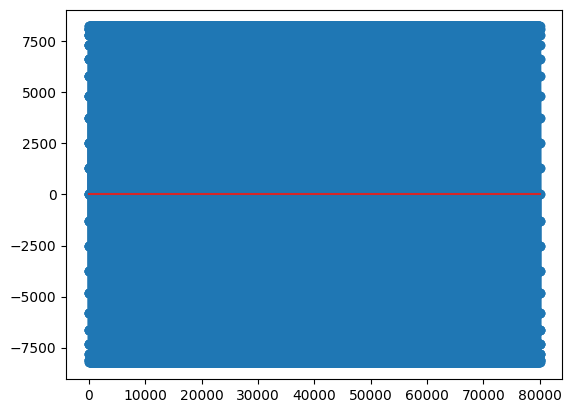

In [ ]:
arrayzeros = np.arange(np.size(sin200))

plt.stem(arrayzeros, sin200)

# **Letra A**

In [3]:
size = np.size(sin200)

result = np.zeros(size)

for i in range(0, size):
  result[i] = sin200[i] + sin2000[i]
  #print(f'Sin 200hz: {sin200[i]}\n')
  #print(f'Sin 2000hz: {sin2000[i]}\n')
  #print(f'Result: {result[i]}\n')


<StemContainer object of 3 artists>

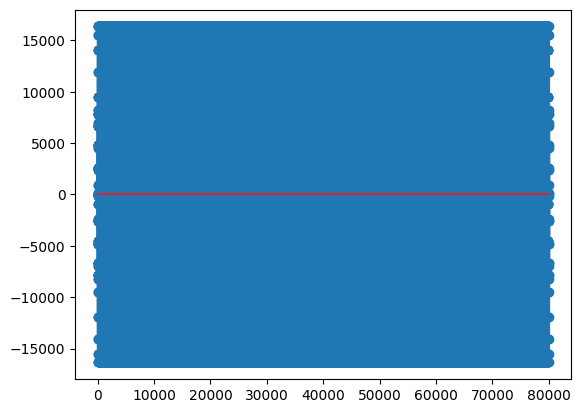

In [ ]:
arrayzeros = np.arange(size)

plt.stem(arrayzeros, result)

# **Letra B**

In [4]:
size = np.size(sin200)

resultB = np.zeros(size)

for i in range(0, size):
  resultB[i] = sin200[i] * sin2000[i]


<ipython-input-4-3ed74049f91a>:6: RuntimeWarning: overflow encountered in short_scalars
  resultB[i] = sin200[i] * sin2000[i]


In [5]:
from scipy.io.wavfile import write
#Save File...
#sav_y.export('sinal_saida.pcm', format='s16le', bitrate='8k')
write('sinal_saida.pcm', 8000, result.astype(np.int16))

In [6]:
write('sinal_saidaB.pcm', 8000, resultB.astype(np.int16))

# **2**

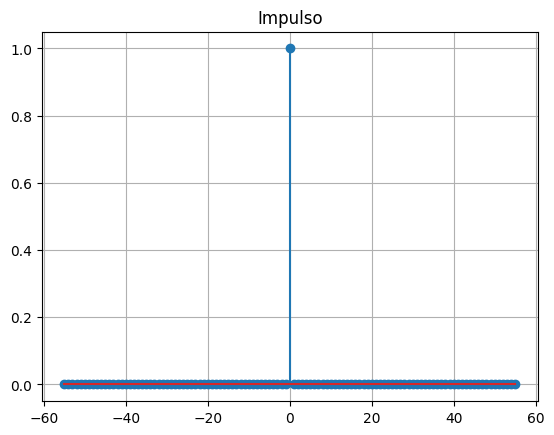

In [7]:
# Código para gerar impulso

array = np.arange(-55, 56)
l = np.size(array)
impulse = np.zeros(l)
indice = np.where(array==0)
impulse[indice] = 1
plt.stem(array, impulse)
plt.title("Impulso")
plt.grid()

8


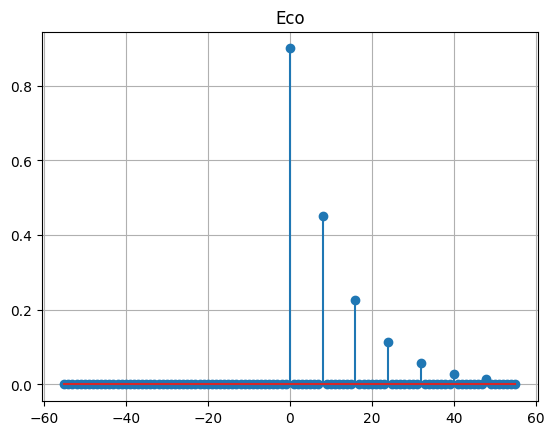

In [8]:
Fs = 8000 # Frq de amostragem
t1 = 0.001 # tempo 1 para o n1
#t2 = 15*10**-3 # tempo 2 para o n2
a0 = 0.9 # amostra 0
a1 = 0.5 # amostra 1
#a2 = 0.2 # amostra 2
d1 = int(t1*Fs) #
#n2 = int(t2*Fs) #
print(d1)

y = np.zeros(np.size(impulse))

for i in range(np.size(impulse)):
    #y[i] = (a0 * step[i] + a1 * y[i - n1] )#+ a2 * saida[pointer - n2])
    y[i] = (a0 * impulse[i] + a1 * y[i - d1] )
plt.stem(array, y)
plt.title("Eco")
plt.grid()

<StemContainer object of 3 artists>

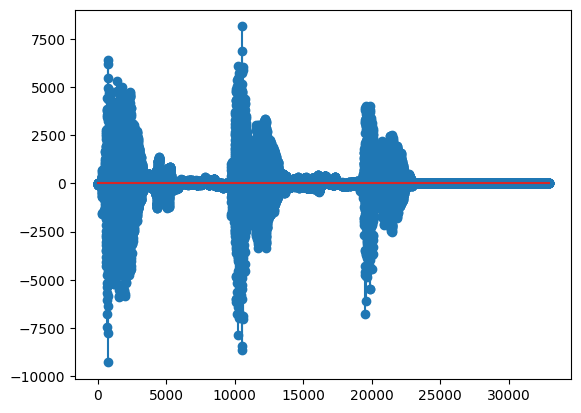

In [9]:
alo = np.memmap('/content/drive/MyDrive/Processamento_Digital_De_Sinais/Aula_5/aloprofessor.pcm', mode='r', dtype=np.int16)

arrayAlo = np.zeros(np.size(alo) + 10000)

for i in range(0, np.size(alo)):
  arrayAlo[i] = alo[i]

array = np.arange(np.size(arrayAlo))

plt.stem(array, arrayAlo)

In [10]:
Fs = 8000 # Frq de amostragem
t1 = 0.300 # tempo 1 para o n1
a0 = 0.9 # amostra 0
a1 = 0.5 # amostra 1
d1 = int(t1*Fs)
print(d1)

saida = np.zeros(np.size(alo))

for i in range(np.size(alo)):
    saida[i] = a0 * alo[i] + a1 * saida[i - d1]

#plt.stem(saida, array)
#plt.title("Eco")
#plt.grid()

2400


In [11]:
write('sinal_saida_eco.pcm', 8000, saida.astype(np.int16))

# **3**

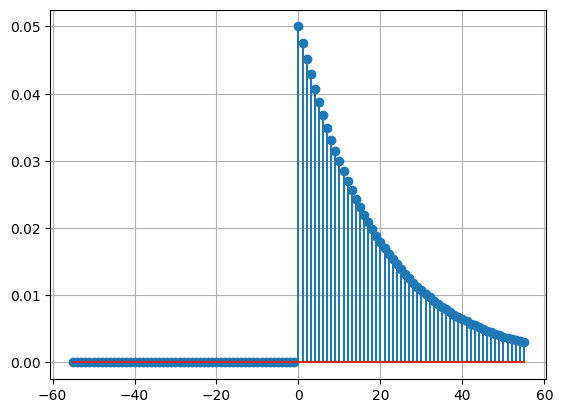

In [12]:
a=0.95
b=1-a

saidaFiltro = np.zeros(np.size(impulse))

array = np.arange(-55, 56)

for i in range(np.size(impulse)):
    saidaFiltro[i] = b * impulse[i] + a * saidaFiltro[i - 1]

plt.stem(array, saidaFiltro)
plt.grid()

In [13]:
sin80hz = np.memmap('/content/drive/MyDrive/Processamento_Digital_De_Sinais/Aula_5/sin_80hz.pcm', mode='r', dtype=np.int16)

ruido = np.memmap('/content/drive/MyDrive/Processamento_Digital_De_Sinais/Aula_5/ruido_bra-10.pcm', mode='r', dtype=np.int16)

soma = np.zeros(np.size(sin80hz))
sinRuido = np.zeros(np.size(sin80hz))

for i in range(np.size(sin80hz)):
  soma[i] = sin80hz[i] + ruido[i]

for i in range(np.size(sin80hz)):
  sinRuido[i] = b * soma[i] + a * sinRuido[i - 1]


<ipython-input-13-d1d3354f3750>:9: RuntimeWarning: overflow encountered in short_scalars
  soma[i] = sin80hz[i] + ruido[i]


In [14]:
write('sinal_saida_ruido.pcm', 8000, sinRuido.astype(np.int16))

# **4**

In [15]:
tamanho_bloco = 16
threshold=600

saida = np.zeros(np.size(alo))

saida = np.copy(alo)

# Processa o vetor em blocos do tamanho especificado
for i in range(0, np.size(saida), tamanho_bloco):
  bloco = saida[i:i+tamanho_bloco]
  # Verifica se todos os elementos do bloco são menores que o threshold
  if all(elemento < threshold for elemento in bloco):
    # Se todos os elementos são menores que o threshold, eles são zerados
    saida[i:i+tamanho_bloco] = [0]*np.size(bloco)

In [ ]:
for i in range(0, len(saida), 1000):
  print(saida[i])

0
69
-2564
1368
0
0
0
0
0
0
1579
1567
-2088
1281
0
0
0
0
0
0
0
0
-967


In [16]:
write('sinal_saida_potência.pcm', 8000, saida.astype(np.int16))